In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('HomeC_Device.csv')
df

,time,Barn_r,Barn_p,Dishwasher_r,Dishwasher_p,Fridge_r,Fridge_p,Furnace_r,Furnace_p,Garage door_r,...,Well_r,Well_p,Wine cellar_r,Wine cellar_p,month,day,weekday,hour,minute,fare
0,2016-11-01 00:01:00,0.029750,0.025337,0.000000,-0.006463,0.005400,0.008750,0.088783,0.087916,0.039867,...,0.001000,0.013481,0.007933,0.006773,11,1,Tuesday,0,1,153.0
1,2016-11-01 00:02:00,0.029733,0.025807,0.000000,-0.006290,0.005033,0.008470,0.141400,0.156919,0.033667,...,0.001000,0.013835,0.007917,0.006821,11,1,Tuesday,0,2,153.0
2,2016-11-01 00:03:00,0.029533,0.025576,0.000017,-0.006267,0.005067,0.008500,0.201750,0.235353,0.013200,...,0.001000,0.013835,0.007933,0.006838,11,1,Tuesday,0,3,153.0
3,2016-11-01 00:04:00,0.029333,0.025345,0.000100,-0.006155,0.005333,0.008742,0.691767,0.648559,0.013483,...,0.000967,0.013528,0.008367,0.007273,11,1,Tuesday,0,4,153.0
4,2016-11-01 00:05:00,0.029400,0.025422,0.000100,-0.006155,0.005300,0.008711,0.662050,0.620258,0.013450,...,0.001000,0.013835,0.008317,0.007223,11,1,Tuesday,0,5,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43194,2016-11-30 23:55:00,0.029967,0.023220,0.000017,-0.004931,0.121600,0.120958,0.086767,0.083554,0.013167,...,0.000983,0.011599,0.007750,0.006671,11,30,Wednesday,23,55,153.0
43195,2016-11-30 23:56:00,0.030017,0.023276,0.000017,-0.004931,0.121267,0.120613,0.086267,0.082856,0.013183,...,0.001000,0.011753,0.007750,0.006671,11,30,Wednesday,23,56,153.0
43196,2016-11-30 23:57:00,0.029900,0.023145,0.000017,-0.004931,0.121683,0.121045,0.084800,0.080806,0.013167,...,0.000950,0.011291,0.007983,0.006906,11,30,Wednesday,23,57,153.0
43197,2016-11-30 23:58:00,0.029900,0.023145,0.000017,-0.004931,0.121117,0.120458,0.085950,0.082413,0.013183,...,0.000967,0.011444,0.007700,0.006621,11,30,Wednesday,23,58,153.0


In [24]:
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2016-11-01 00:01:00', '2016-11-01 00:02:00',
               '2016-11-01 00:03:00', '2016-11-01 00:04:00',
               '2016-11-01 00:05:00', '2016-11-01 00:06:00',
               '2016-11-01 00:07:00', '2016-11-01 00:08:00',
               '2016-11-01 00:09:00', '2016-11-01 00:10:00',
               ...
               '2016-11-30 23:50:00', '2016-11-30 23:51:00',
               '2016-11-30 23:52:00', '2016-11-30 23:53:00',
               '2016-11-30 23:54:00', '2016-11-30 23:55:00',
               '2016-11-30 23:56:00', '2016-11-30 23:57:00',
               '2016-11-30 23:58:00', '2016-11-30 23:59:00'],
              dtype='datetime64[ns]', name='time', length=43199, freq=None)

In [25]:
df = df.loc[df['day']==1]

In [26]:
# 1분
df_p = df.iloc[:,[i for i in range(1,25,2)]]
df_p

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 00:01:00,0.025337,-0.006463,0.008750,0.087916,0.042479,0.167406,-0.001395,0.002058,0.001758,0.385787,0.013481,0.006773
2016-11-01 00:02:00,0.025807,-0.006290,0.008470,0.156919,0.036433,0.165267,-0.000902,0.001721,0.001565,0.384670,0.013835,0.006821
2016-11-01 00:03:00,0.025576,-0.006267,0.008500,0.235353,0.013274,0.163328,-0.000955,0.001614,0.001473,0.384825,0.013835,0.006838
2016-11-01 00:04:00,0.025345,-0.006155,0.008742,0.648559,0.013604,0.164950,-0.000875,0.001640,0.001382,0.382497,0.013528,0.007273
2016-11-01 00:05:00,0.025422,-0.006155,0.008711,0.620258,0.013566,0.164431,-0.000928,0.001479,0.001382,0.382481,0.013835,0.007223
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 23:55:00,0.034907,-0.007042,0.008225,0.505298,0.012163,0.140409,-0.002384,0.001386,0.003480,0.356518,0.012650,0.006348
2016-11-01 23:56:00,0.034907,-0.007042,0.008225,0.479279,0.012182,0.144221,-0.002463,0.001626,0.003526,0.356963,0.012650,0.006381
2016-11-01 23:57:00,0.034907,-0.007224,0.008391,0.340583,0.012591,0.145681,-0.002727,0.001573,0.003526,0.359892,0.012497,0.006599


In [27]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

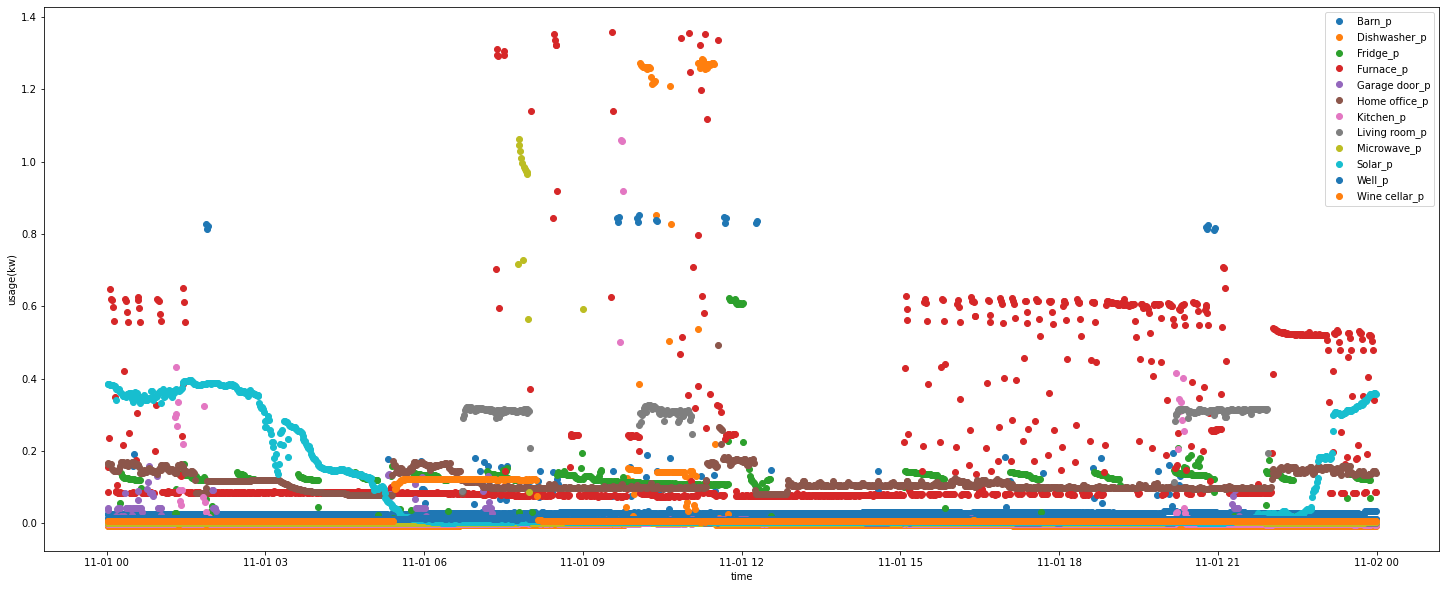

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot_date(df_p.index, df_p)
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))

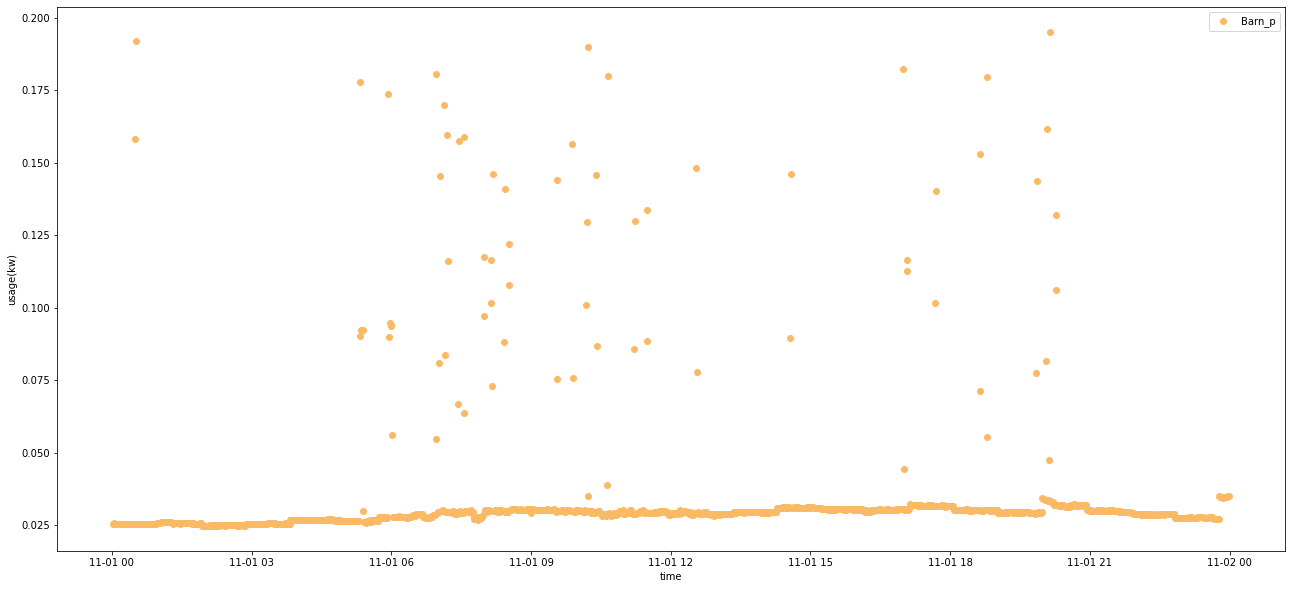

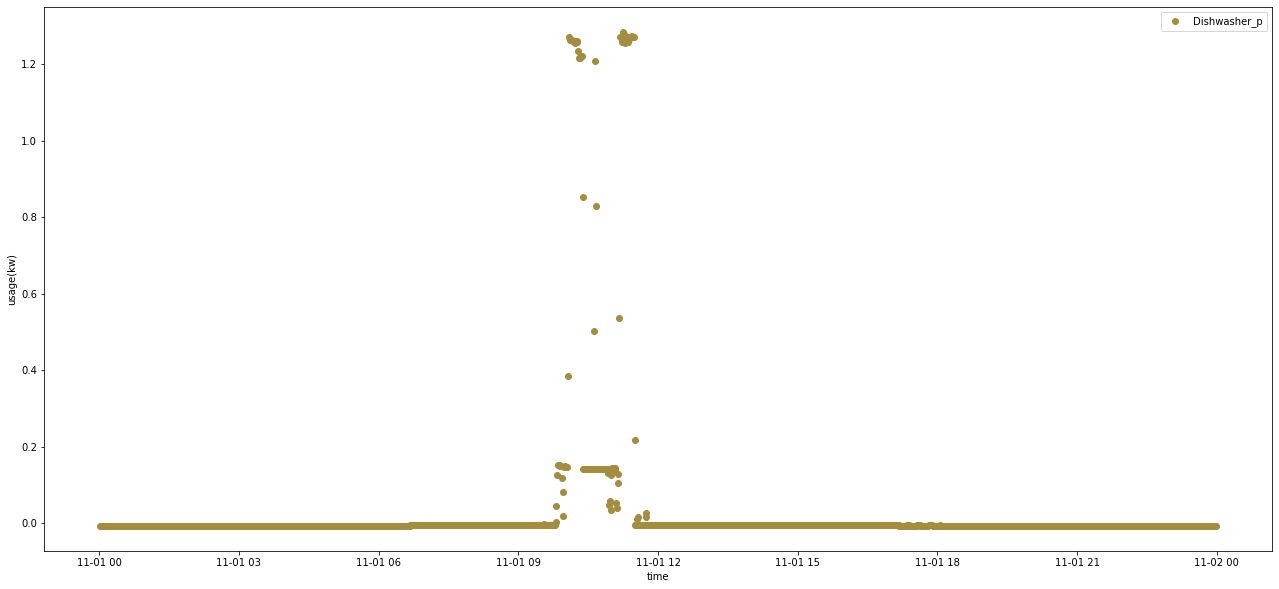

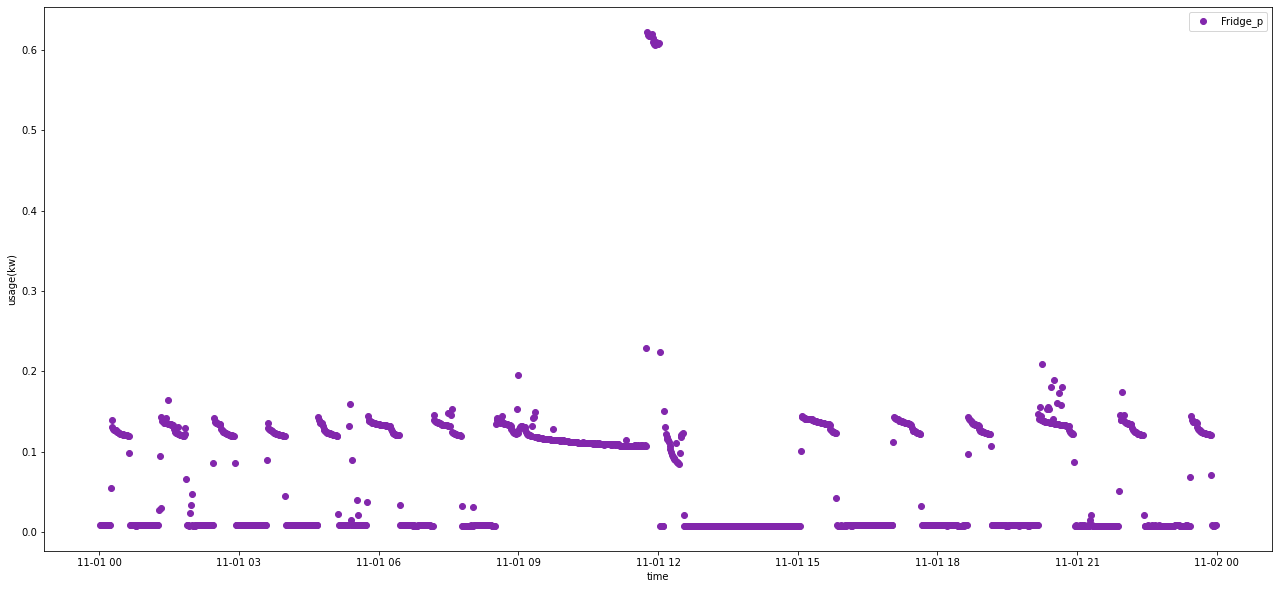

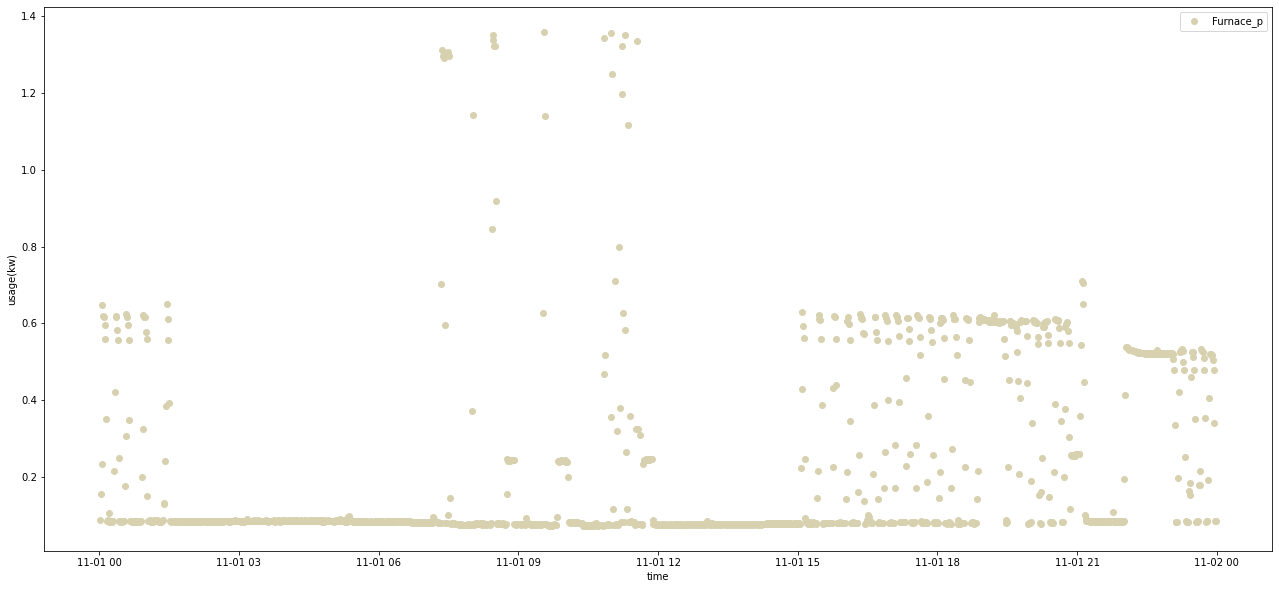

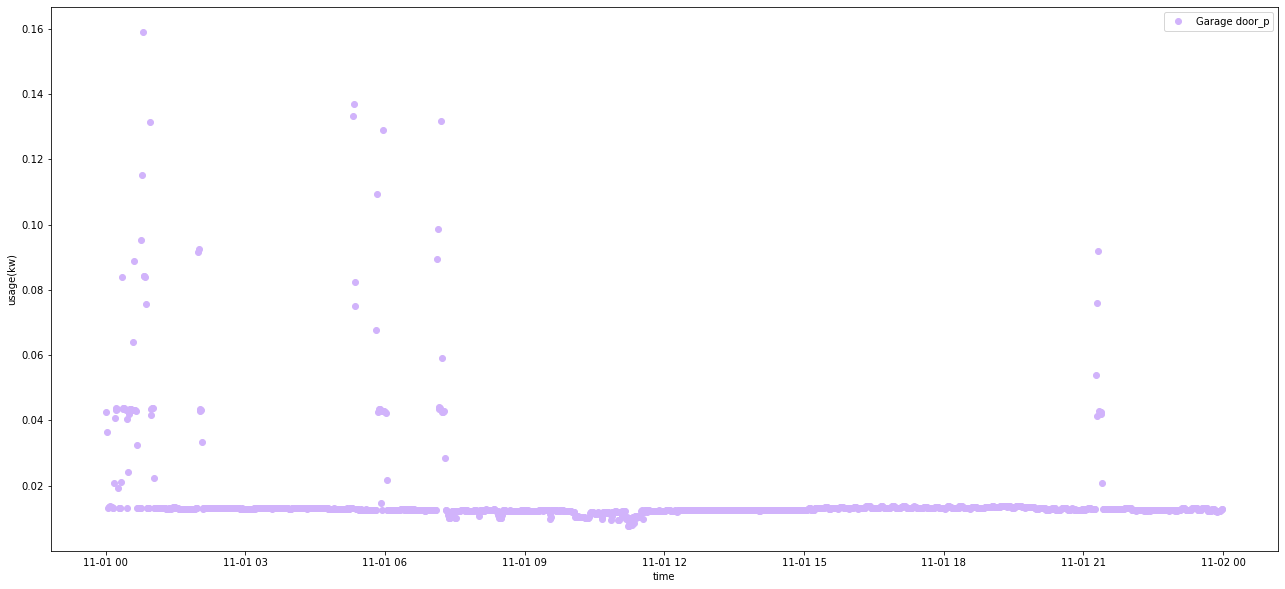

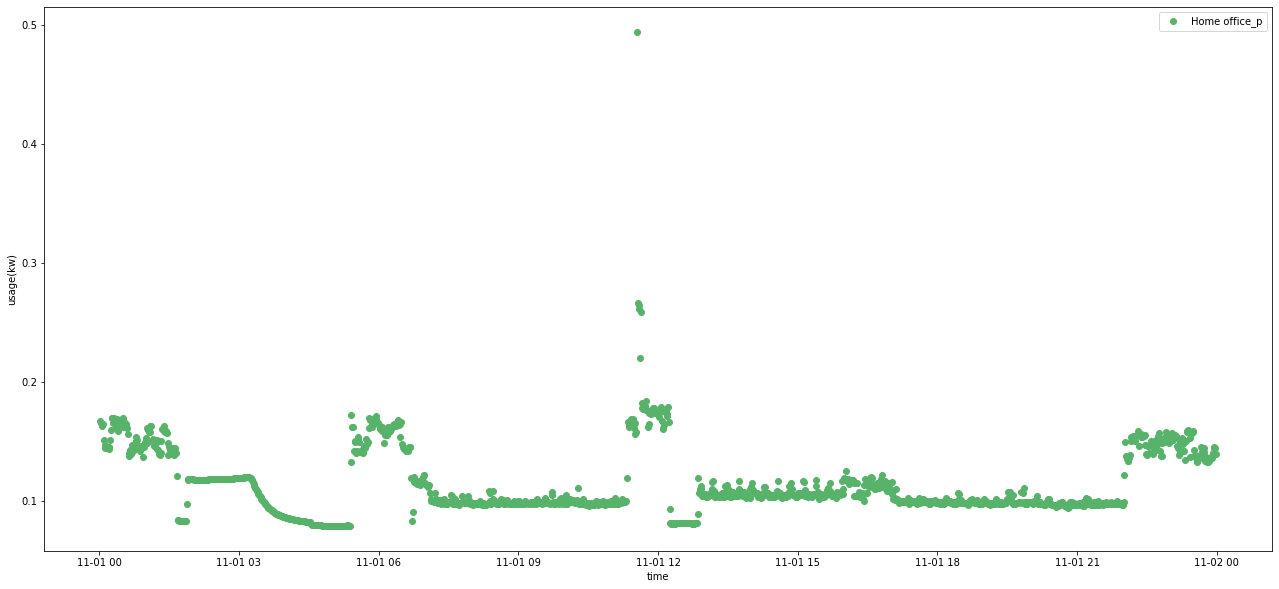

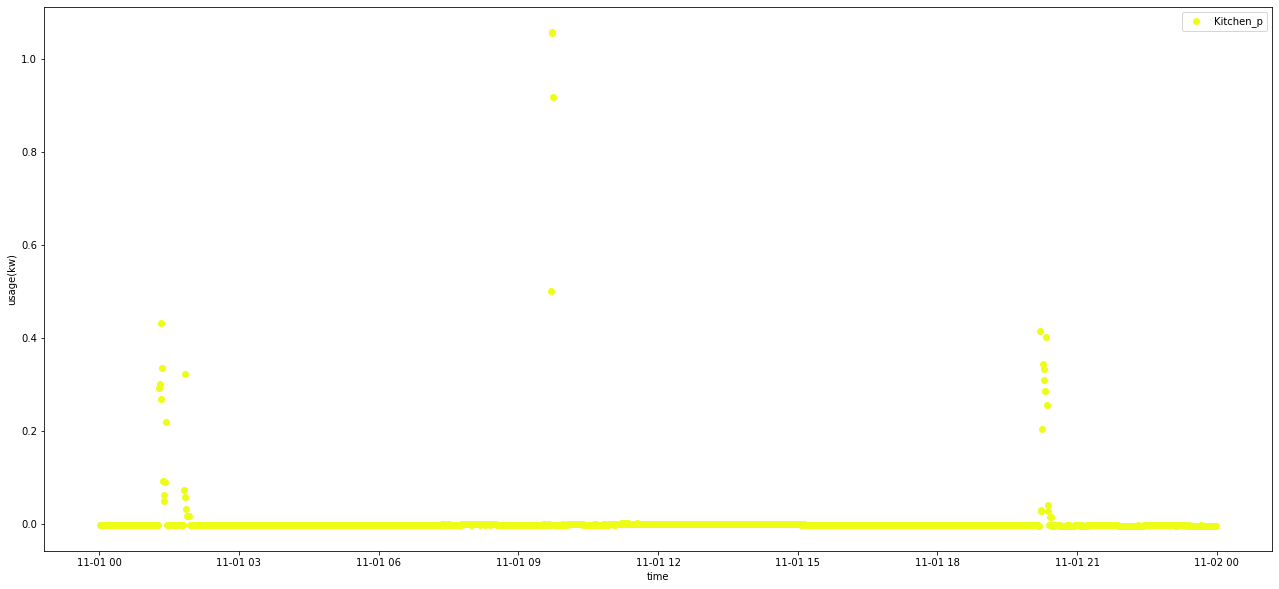

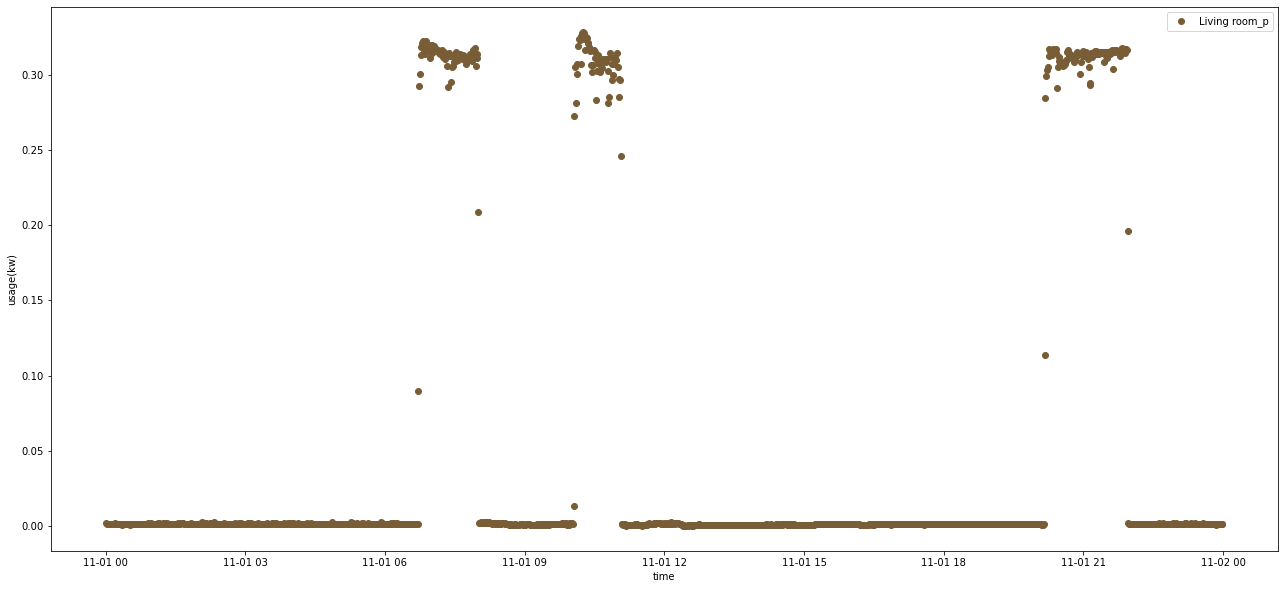

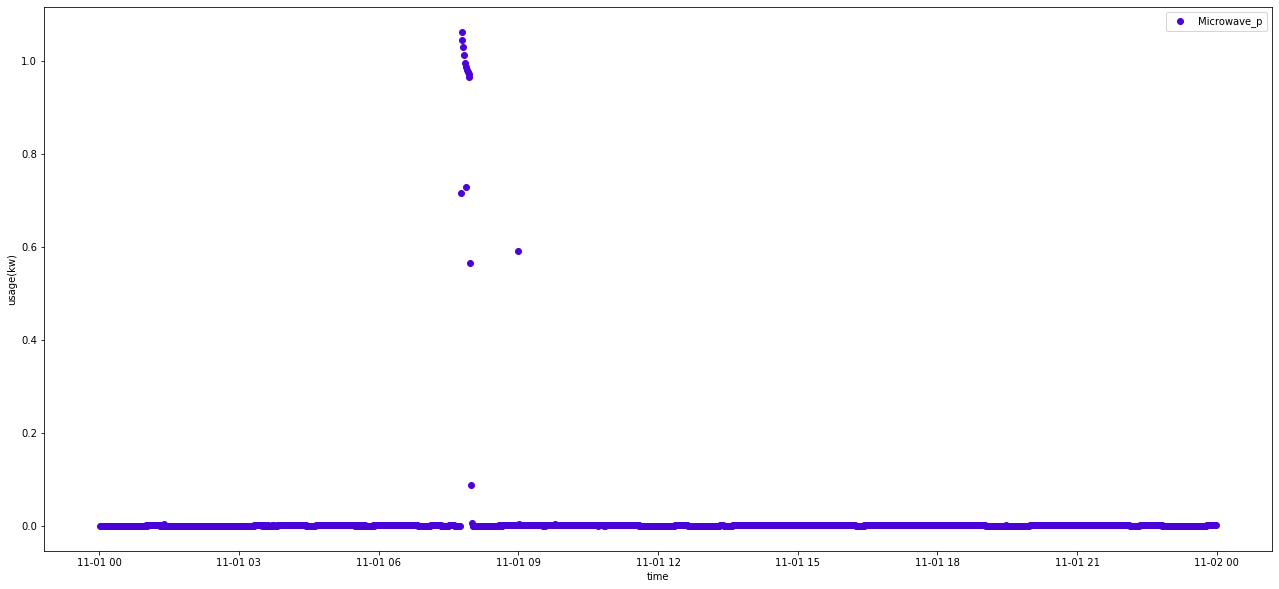

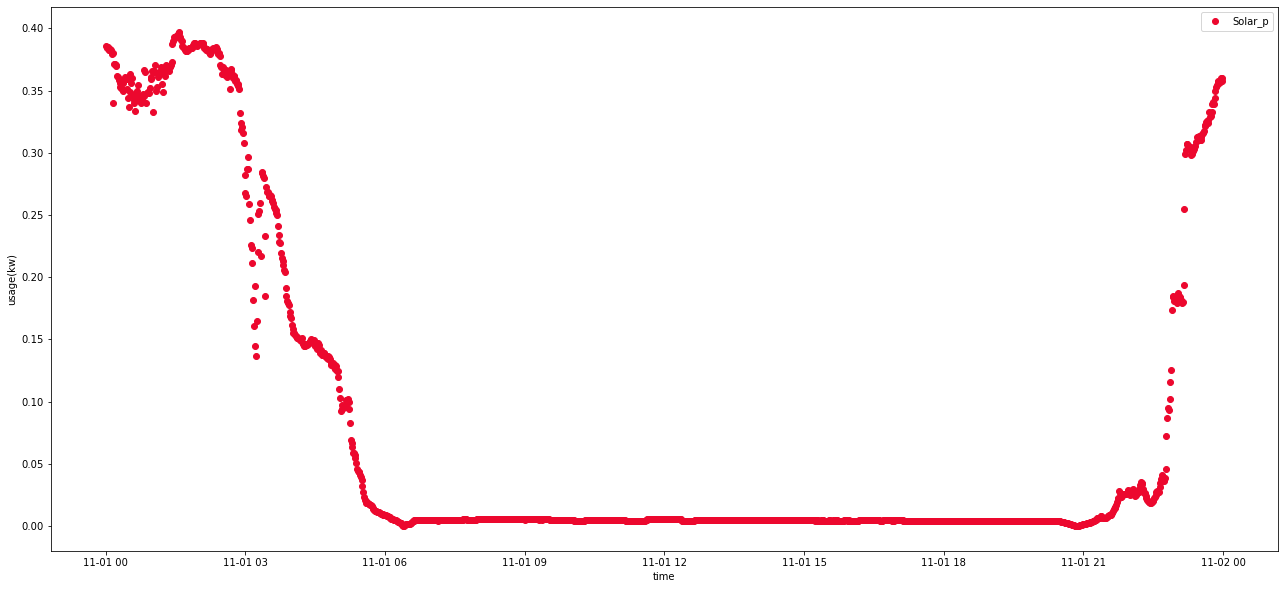

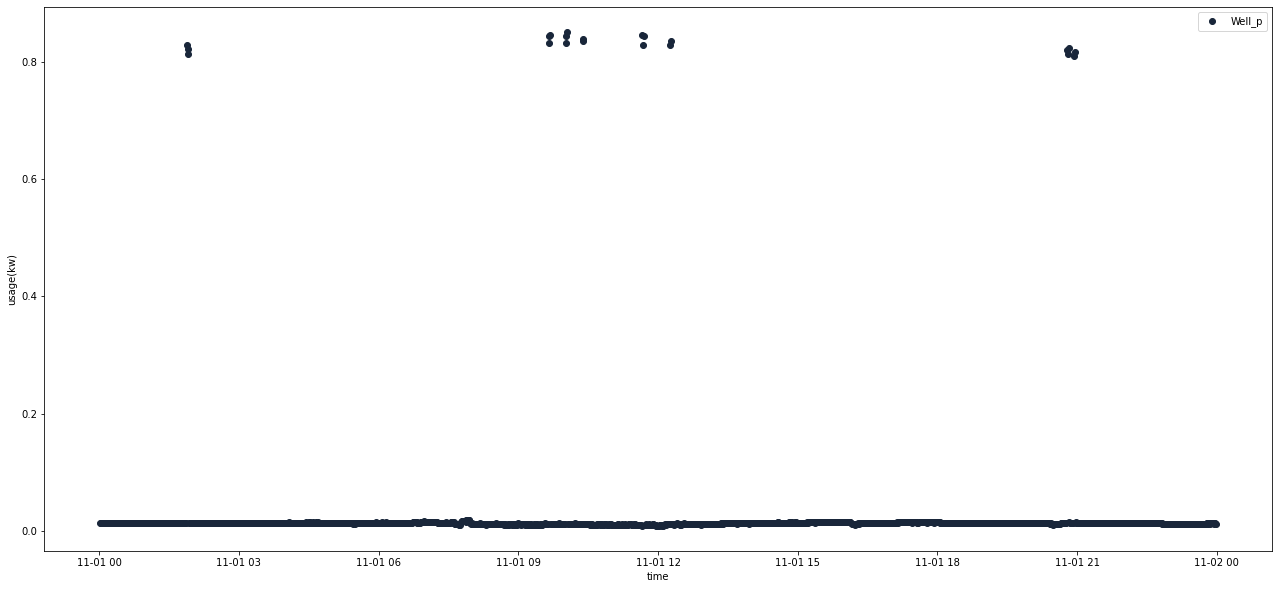

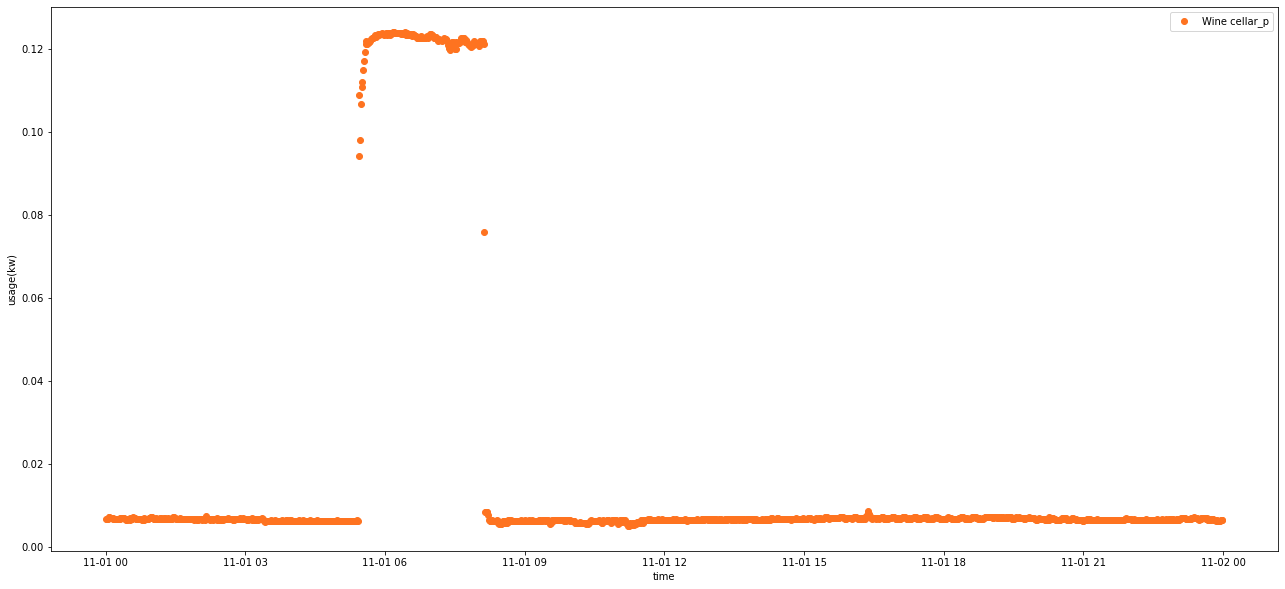

In [29]:
for col in cols:
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.plot_date(df_p.index, df_p[col], label=col, c=np.random.rand(3,))
    plt.xlabel("time")
    plt.ylabel("usage(kw)")
    ax.legend()

In [30]:
series_spec = df_p[col]
series_spec.values

array([0.00677287, 0.0068209 , 0.00683766, ..., 0.00659855, 0.00666546,
       0.00661527])

In [31]:
series_fit = series_spec.values.reshape(-1,1)
series_fit.shape
series_fit

array([[0.00677287],
       [0.0068209 ],
       [0.00683766],
       ...,
       [0.00659855],
       [0.00666546],
       [0.00661527]])

In [32]:
pip install tslearn


[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
from tslearn.clustering import TimeSeriesKMeans

In [34]:
model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, verbose=1)
y_pred = model.fit_predict(series_fit)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2878 out of 2878 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2878 out of 2878 | elapsed:    0.1s finished


In [35]:
# 군집의 center 얼마나 뭉쳤는지 확인
# 작을 수록 잘 뭉침
print(f'Inertia: {model.inertia_}')
# 각 군집의 center 값 확인
print(f'cluster_center {model.cluster_centers_}')
# series -> dataframe
df_spec = series_spec.to_frame(name=col)
# clustering label 삽입
df_spec['cluster'] = y_pred
df_spec

Inertia: 3.1328192901934007e-06
cluster_center [[[0.0067001 ]]

 [[0.12155306]]]


,Wine cellar_p,cluster
time,,
2016-11-01 00:01:00,0.006773,0
2016-11-01 00:02:00,0.006821,0
2016-11-01 00:03:00,0.006838,0
2016-11-01 00:04:00,0.007273,0
2016-11-01 00:05:00,0.007223,0
...,...,...
2016-11-01 23:55:00,0.006348,0
2016-11-01 23:56:00,0.006381,0
2016-11-01 23:57:00,0.006599,0


In [36]:
label_0 = df_spec.loc[df_spec.cluster==0].index
label_1 = df_spec.loc[df_spec.cluster==1].index

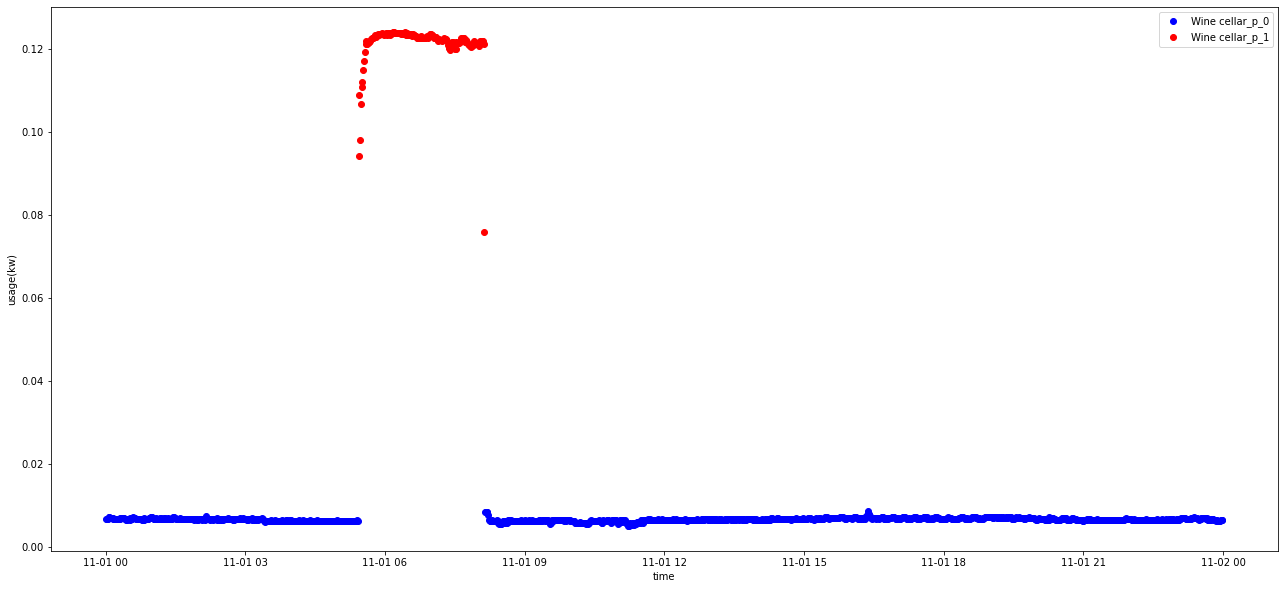

In [37]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot_date(label_0, df_spec[col][label_0], label=f'{col}_0', c='blue')
ax.plot_date(label_1, df_spec[col][label_1], label=f'{col}_1', c='red')
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend()

In [38]:
ols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

# model
model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, n_jobs=6, verbose=1)


# 기기별 y_pred Dict
y_pred_dict = {}

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Barn_p_cluster_center [[[0.02919768]]

 [[0.12915287]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 

0.002 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.001 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.001 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Dishwasher_p_cluster_center [[[1.08319306e-03]]

 [[1.23707366e+00]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.003 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.003 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.003 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Fridge_p_cluster_center [[[0.00929827]]

 [[0.13783983]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.011 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.010 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.010 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.010 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Furnace_p_cluster_center [[[0.09833511]]

 [[0.60400732]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Garage door_p_cluster_center [[[0.01379058]]

 [[0.09731101]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Home office_p_cluster_center [[[0.10080302]]

 [[0.15642287]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 

0.001 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.001 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.001 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 

Kitchen_p_cluster_center [[[-2.21117830e-04]]

 [[ 4.61419744e-01]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Living room_p_cluster_center [[[0.00169772]]

 [[0.3102173 ]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.3s finished


0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Microwave_p_cluster_center [[[0.00202716]]

 [[0.90159533]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.002 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.002 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.002 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


0.002 --> 


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Solar_p_cluster_center [[[0.32714698]]

 [[0.01677509]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.3s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Well_p_cluster_center [[[0.01312094]]

 [[0.83180611]]]


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1439 out of 1439 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 

0.000 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


0.000 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2878 out of 2878 | elapsed:    0.2s finished


Wine cellar_p_cluster_center [[[0.12155306]]

 [[0.0067001 ]]]


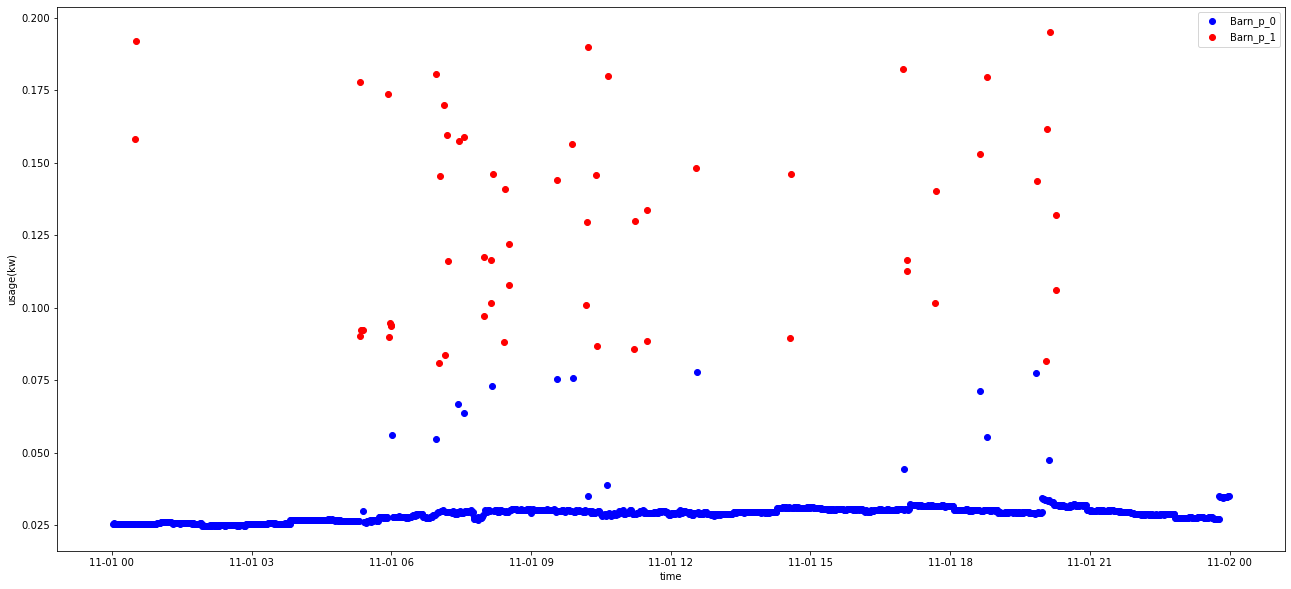

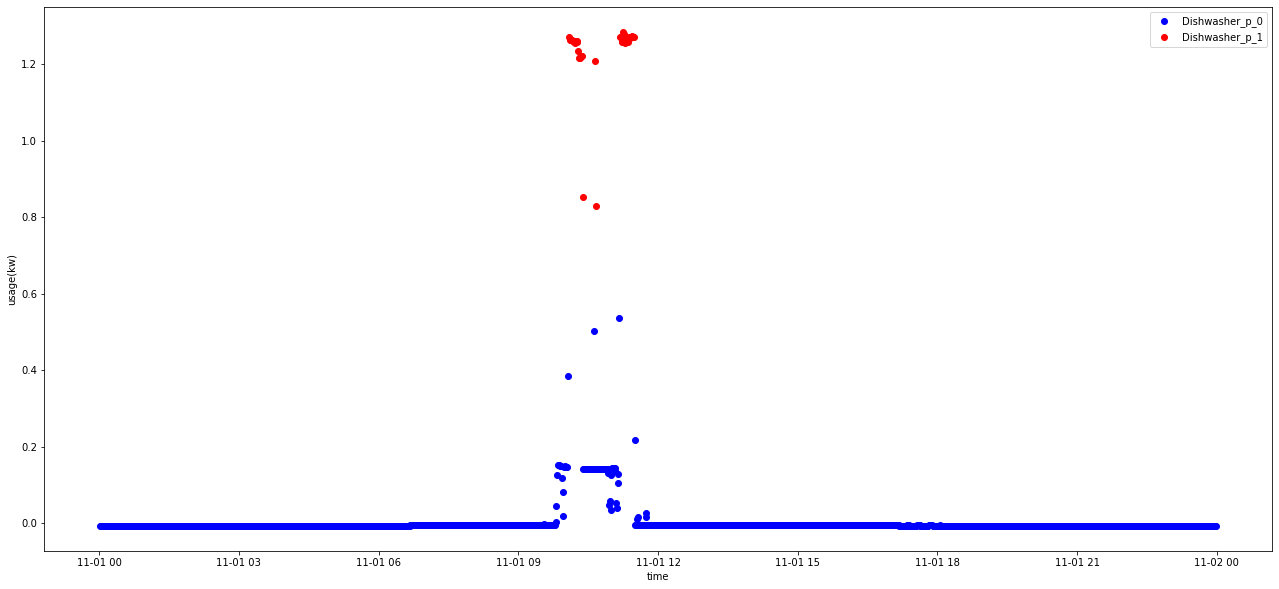

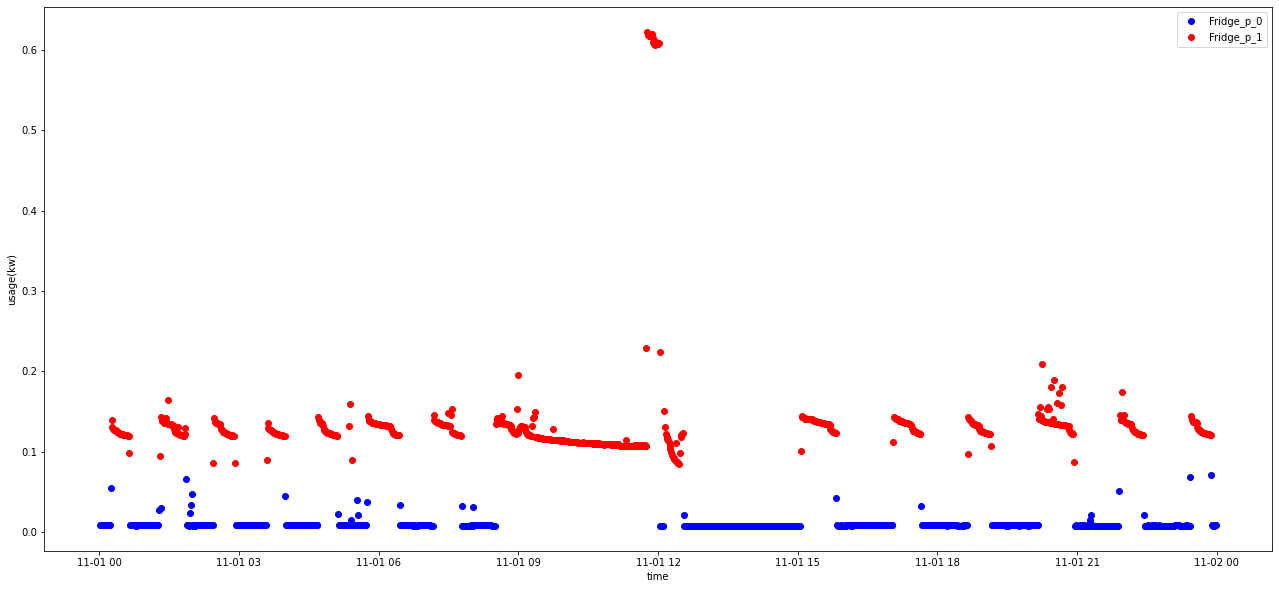

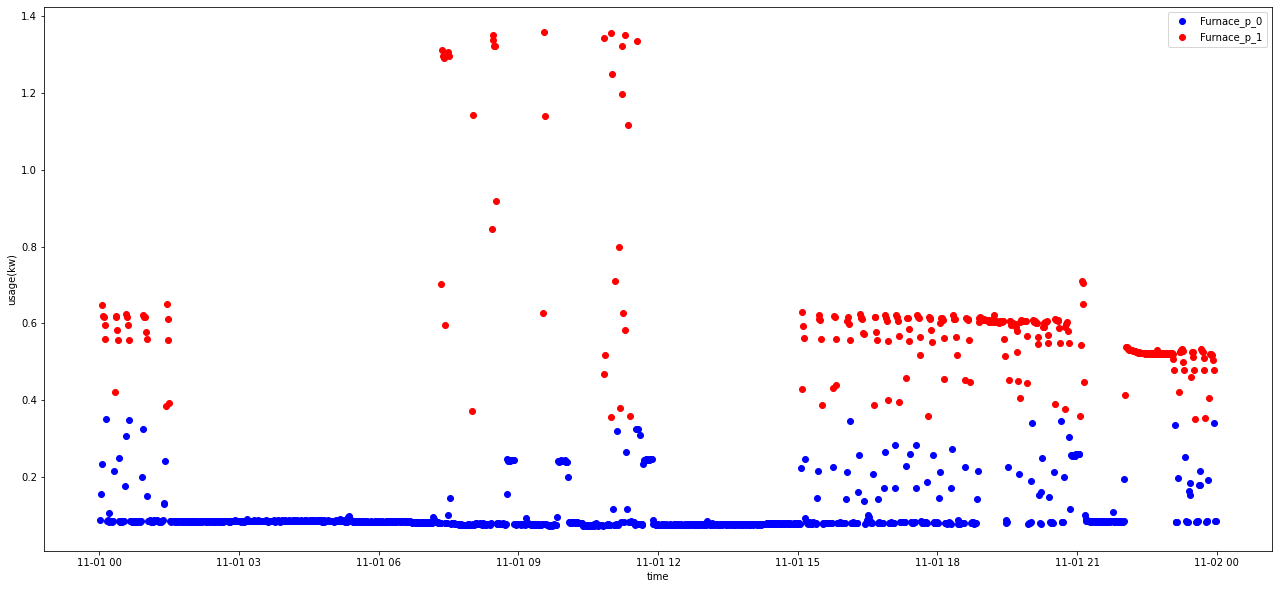

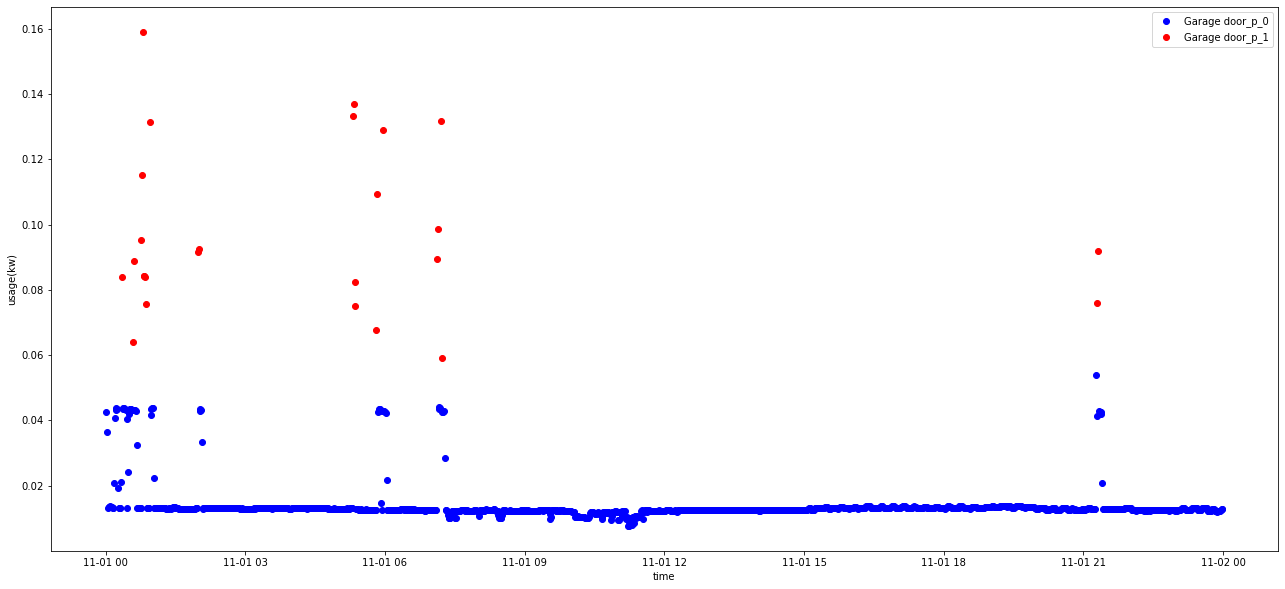

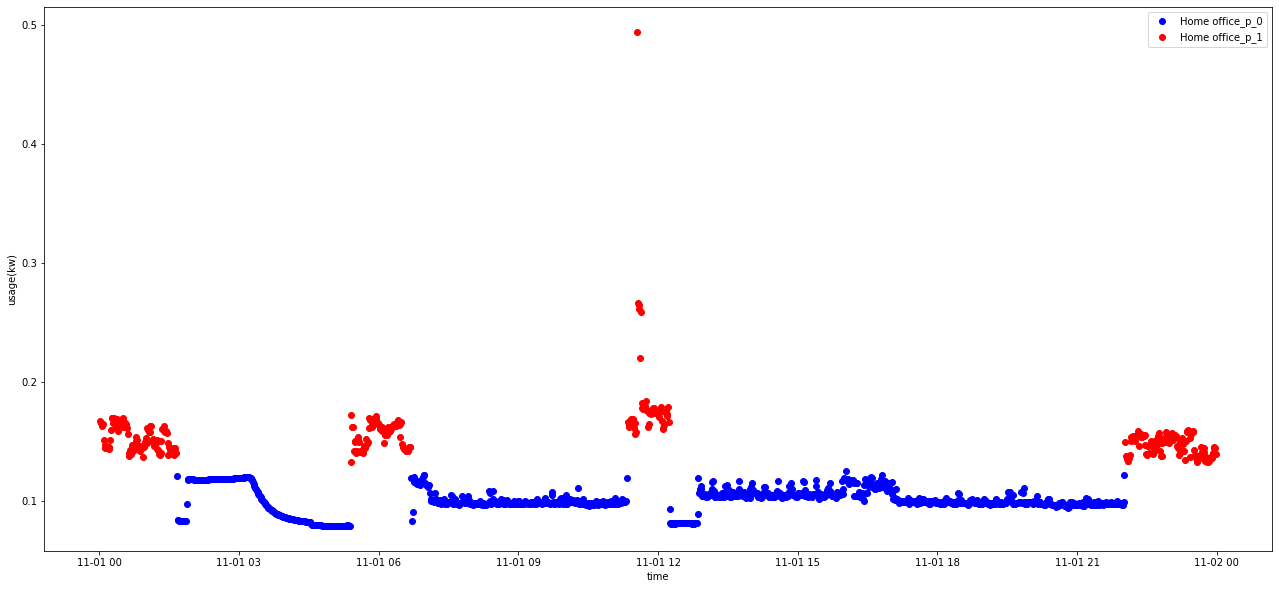

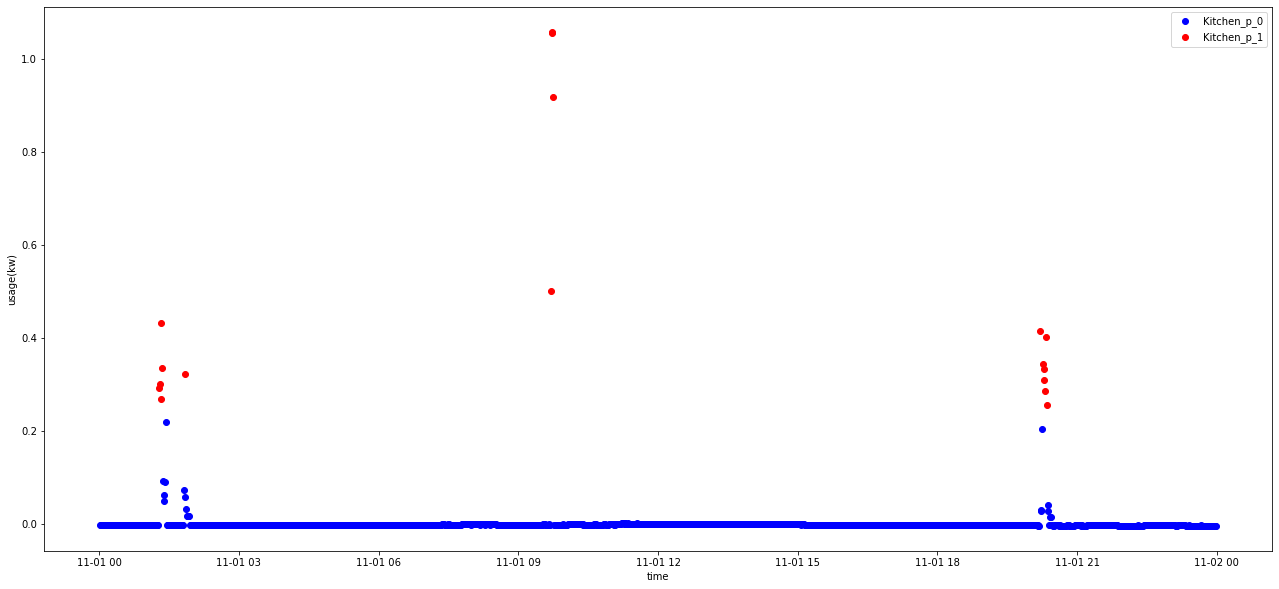

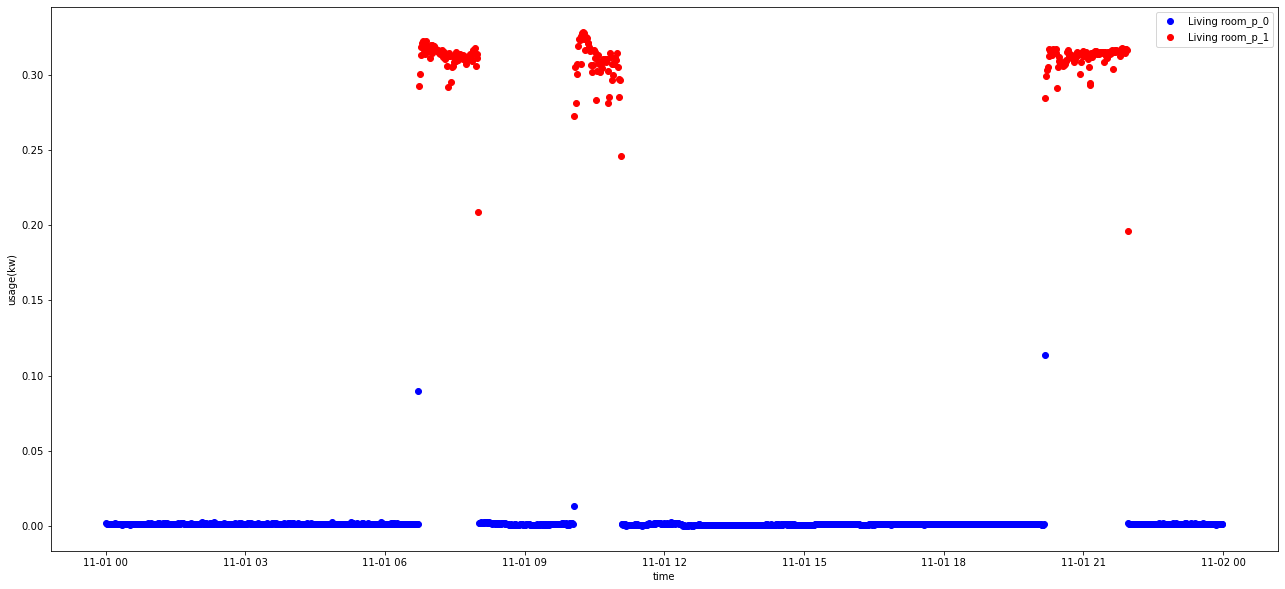

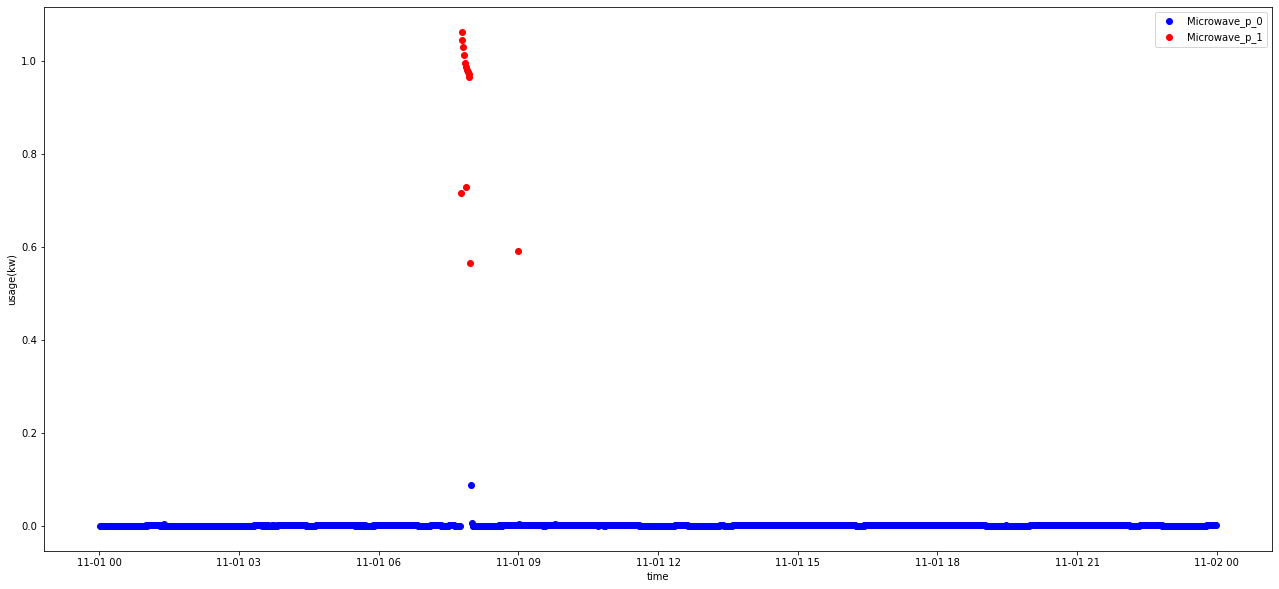

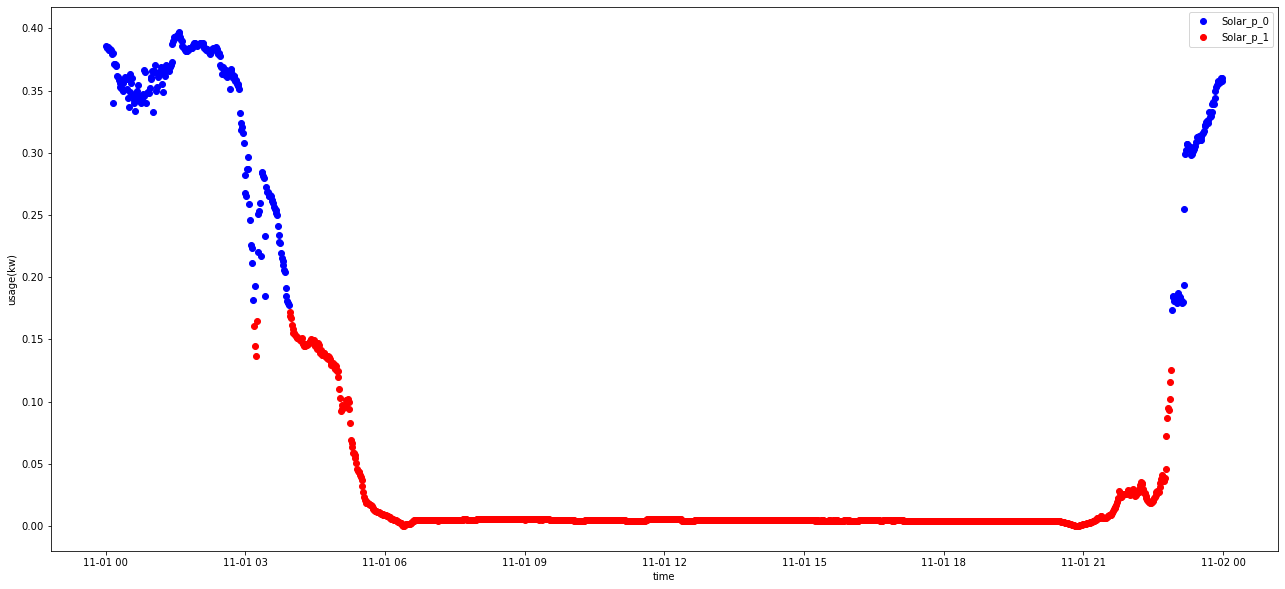

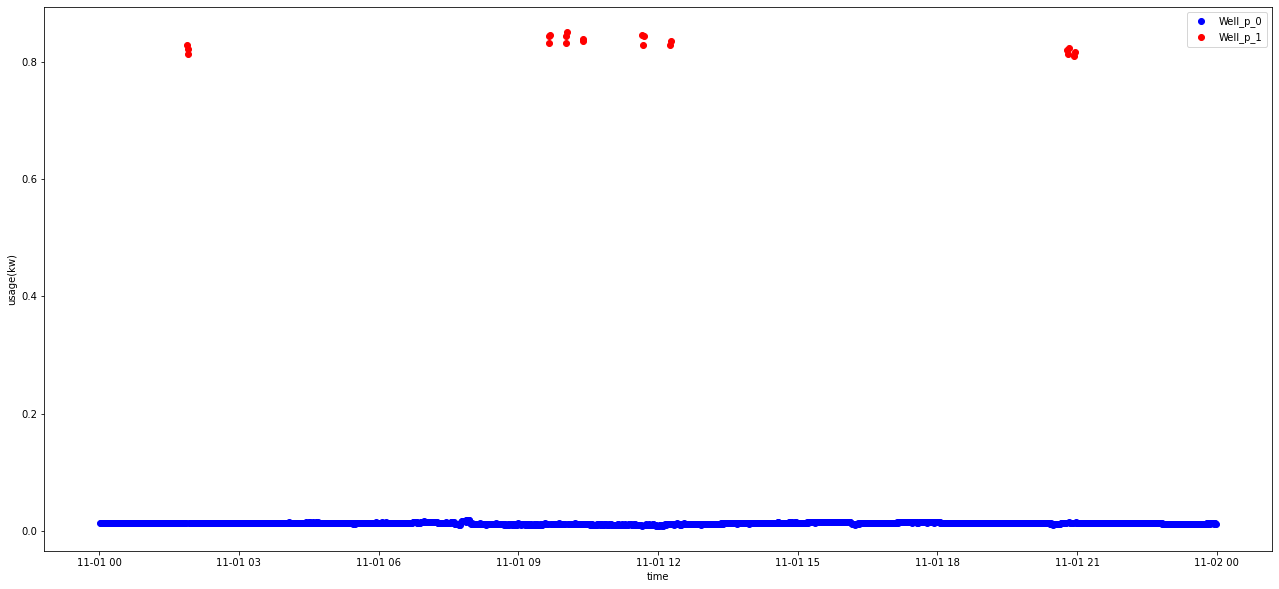

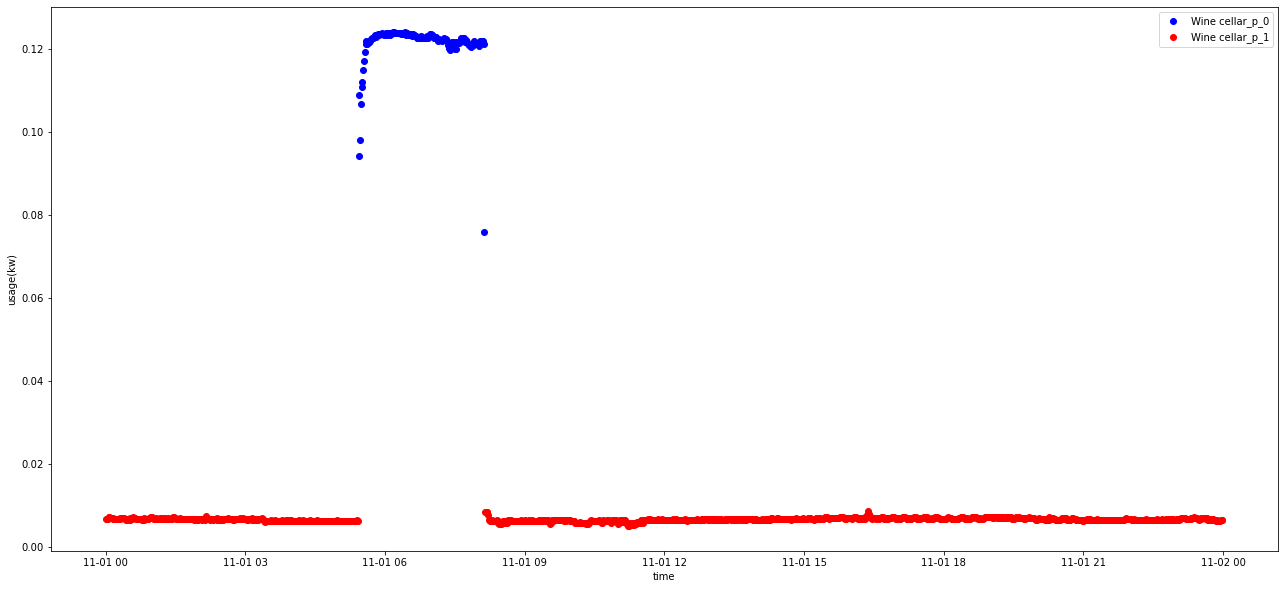

In [39]:
for col in cols:
    series_spec = df_p[col] # 특정 기기 추출
    series_fit = series_spec.values.reshape(-1,1) # model input을 위한 포맷 세팅
    
    # Clustering train 및 predict
    y_pred = model.fit_predict(series_fit)
    
    y_pred_dict[col] = y_pred
    
    # 각 군집의 center 값 확인
    print(f'{col}_cluster_center {model.cluster_centers_}')
    
    # series -> dataframe
    df_spec = series_spec.to_frame(name=col)
    
    # clustering label 삽입
    df_spec['cluster'] = y_pred
    
    # 특정 일자 데이터 추출
    # df_spec_time = df_spec[(day_1):(day_1*2)]
    
    # cluster index 추출
    # label_0 = df_spec_time.loc[df_spec_time.cluster==0].index
    # label_1 = df_spec_time.loc[df_spec_time.cluster==1].index
    
    label_0 = df_spec.loc[df_spec.cluster==0].index
    label_1 = df_spec.loc[df_spec.cluster==1].index
    
    # 시각화
    fig, ax = plt.subplots(figsize=(22, 10))
    # ax.plot_date(label_0, df_spec_time[col][label_0], label=f'{col}_0', c='blue')
    # ax.plot_date(label_1, df_spec_time[col][label_1], label=f'{col}_1', c='red')
    ax.plot_date(label_0, df_spec[col][label_0], label=f'{col}_0', c='blue')
    ax.plot_date(label_1, df_spec[col][label_1], label=f'{col}_1', c='red')
    plt.xlabel("time")
    plt.ylabel("usage(kw)")
    ax.legend()

In [20]:
y_pred_dict

{'Barn_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Dishwasher_p': array([1, 1, 1, ..., 1, 1, 1]),
 'Fridge_p': array([1, 1, 1, ..., 1, 1, 1]),
 'Furnace_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Garage door_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Home office_p': array([1, 1, 1, ..., 1, 1, 1]),
 'Kitchen_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Living room_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Microwave_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Solar_p': array([1, 1, 1, ..., 1, 1, 1]),
 'Well_p': array([0, 0, 0, ..., 0, 0, 0]),
 'Wine cellar_p': array([0, 0, 0, ..., 0, 0, 0])}

In [21]:
# cluster 포함 df
cluster_df = df_p.copy()

In [ ]:
for col in cols:
    cluster_df[f'{col}_cluster'] = y_pred_dict[col]

cluster_df

In [ ]:
# 음수값을 0으로
cols = cluster_df.columns[:]
for col in cols:
    cluster_df.loc[cluster_df[col]<0,[col]] = 0

cluster_df = cluster_df.head()